In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to include a single channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.8958 - loss: 0.3350 - val_accuracy: 0.9855 - val_loss: 0.0450
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9852 - loss: 0.0476 - val_accuracy: 0.9880 - val_loss: 0.0367
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9902 - loss: 0.0316 - val_accuracy: 0.9896 - val_loss: 0.0355
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9925 - loss: 0.0240 - val_accuracy: 0.9892 - val_loss: 0.0324
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9938 - loss: 0.0176 - val_accuracy: 0.9889 - val_loss: 0.0388
313/313 - 2s - 6ms/step - accuracy: 0.9889 - loss: 0.0388

Test accuracy: 0.9889000058174133


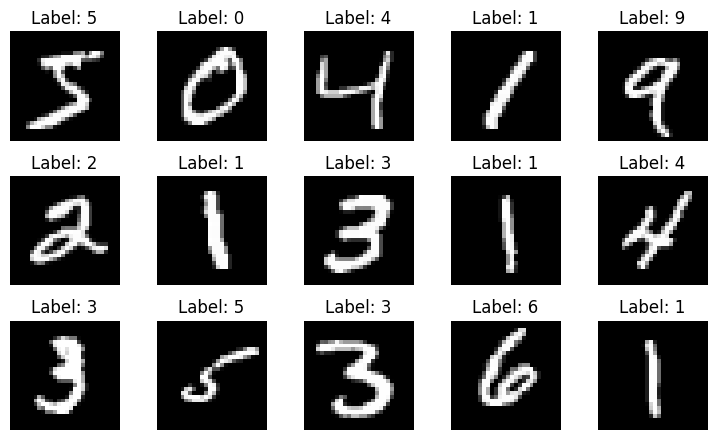

In [4]:
# Function to plot images in a grid
def plot_images(images, labels, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.5 * num_cols, 1.5 * num_rows))
    for i in range(num_rows):
        for j in range(num_cols):
            ax = axes[i, j]
            ax.imshow(images[i * num_cols + j], cmap='gray')
            ax.set_title('Label: {}'.format(labels[i * num_cols + j]))
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Plot the first 15 images from the training set
num_images = 15
plot_images(train_images[:num_images], train_labels[:num_images], num_rows=3, num_cols=5)